# Covid 19 Analysis -  Canada and Rest of the World



In this project , I have visualized the trends of Number of Confirmed, Deaths, Recovered cases in World , Canada and finally presented a Pie Chart which Depicts the worst hit countries by Covid-19

PS: This notebook is set to give an accurate data always which means if anybody is using this notebook after a month, It will reflect correct result always.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv',parse_dates=['Date'])
df['Total Cases']= df['Confirmed']+ df['Recovered']+ df['Recovered']

In [48]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


# Total Cases Per Day - WorldWide

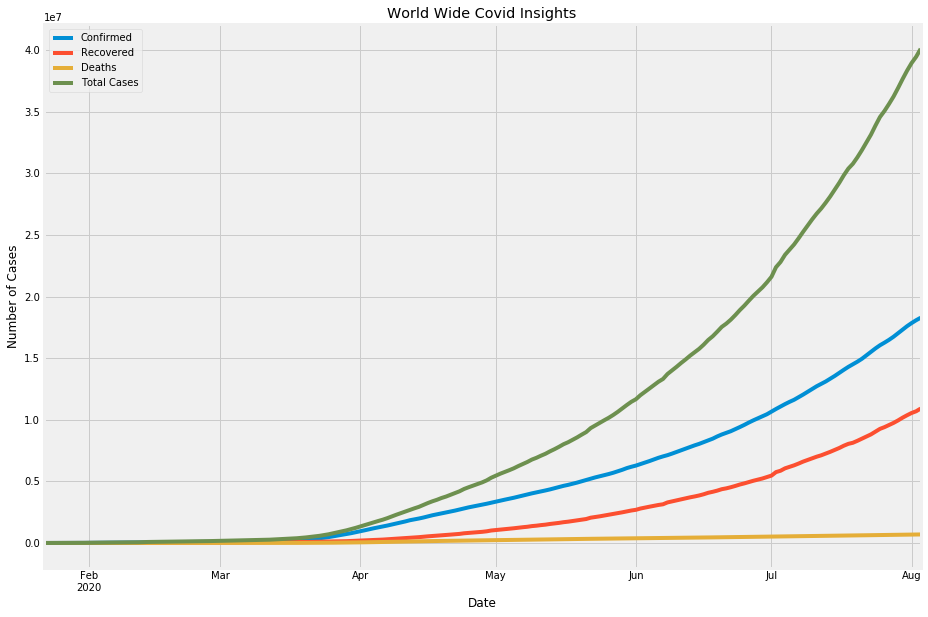

In [49]:
world_df = df.groupby('Date').sum()

world_df.reset_index()

w=world_df.plot(figsize=(14,10))
w.set_xlabel('Date')
w.set_ylabel('Number of Cases')
w.title.set_text('World Wide Covid Insights')
plt.show()

This visualization represents the number of cases of CoronaVirus Keeps on increasing 

# Canada vs WorldWide

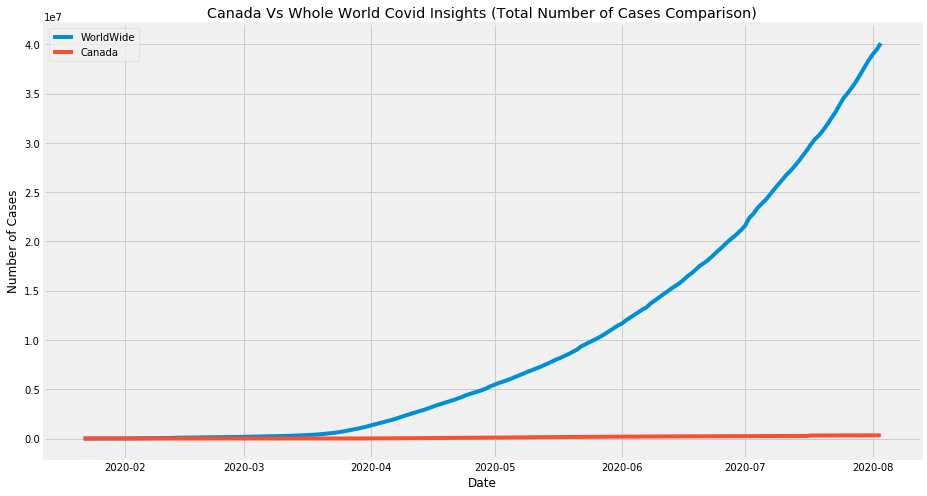

In [80]:
canada_df= df[df['Country']=='Canada']

canada_df_final=canada_df.groupby('Date').sum()

fig =plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.plot(world_df[['Total Cases']], label= 'WorldWide')
ax.plot(canada_df_final[['Total Cases']], label= 'Canada')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.title.set_text('Canada Vs Whole World Covid Insights (Total Number of Cases Comparison)')

plt.legend(loc='best')
plt.show()

# Daily Cases and Deaths - Canada

In [57]:
canada_df_final=canada_df_final.reset_index()

In [58]:
canada_df_final['Daily Confirmed']= canada_df_final['Confirmed'].sub(canada_df_final['Confirmed'].shift())

In [60]:
canada_df_final['Daily Recovered']= canada_df_final['Recovered'].sub(canada_df_final['Recovered'].shift())
canada_df_final['Daily Deaths']= canada_df_final['Deaths'].sub(canada_df_final['Deaths'].shift())

In [61]:
canada_df_final

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Recovered,Daily Deaths
0,2020-01-22,0,0,0,0,NaN,NaN,NaN
1,2020-01-23,0,0,0,0,0.0,0.0,0.0
2,2020-01-24,0,0,0,0,0.0,0.0,0.0
3,2020-01-25,0,0,0,0,0.0,0.0,0.0
4,2020-01-26,1,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
190,2020-07-30,117677,102344,8974,322365,320.0,352.0,12.0
191,2020-07-31,118281,102906,8980,324093,604.0,562.0,6.0
192,2020-08-01,118523,103072,8986,324667,242.0,166.0,6.0
193,2020-08-02,118768,103201,8990,325170,245.0,129.0,4.0


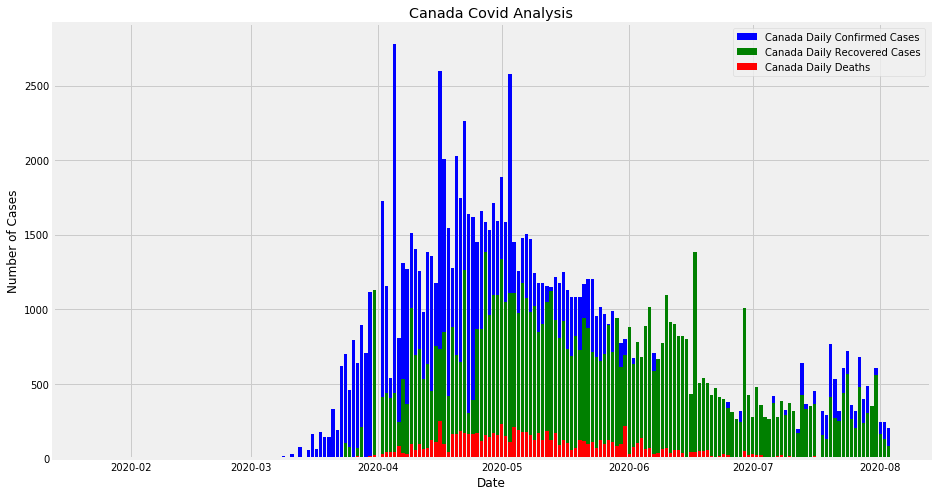

In [79]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.bar(canada_df_final['Date'],canada_df_final['Daily Confirmed'],color='b', label= 'Canada Daily Confirmed Cases')
ax.bar(canada_df_final['Date'],canada_df_final['Daily Recovered'],color='g', label= 'Canada Daily Recovered Cases')
ax.bar(canada_df_final['Date'],canada_df_final['Daily Deaths'],color='r', label= 'Canada Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.title.set_text('Canada Covid Analysis')

plt.legend(loc='best')
plt.show()

# World's Most Affected Countries by  Covid

/Library/anaconda3/envs/mytfenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """


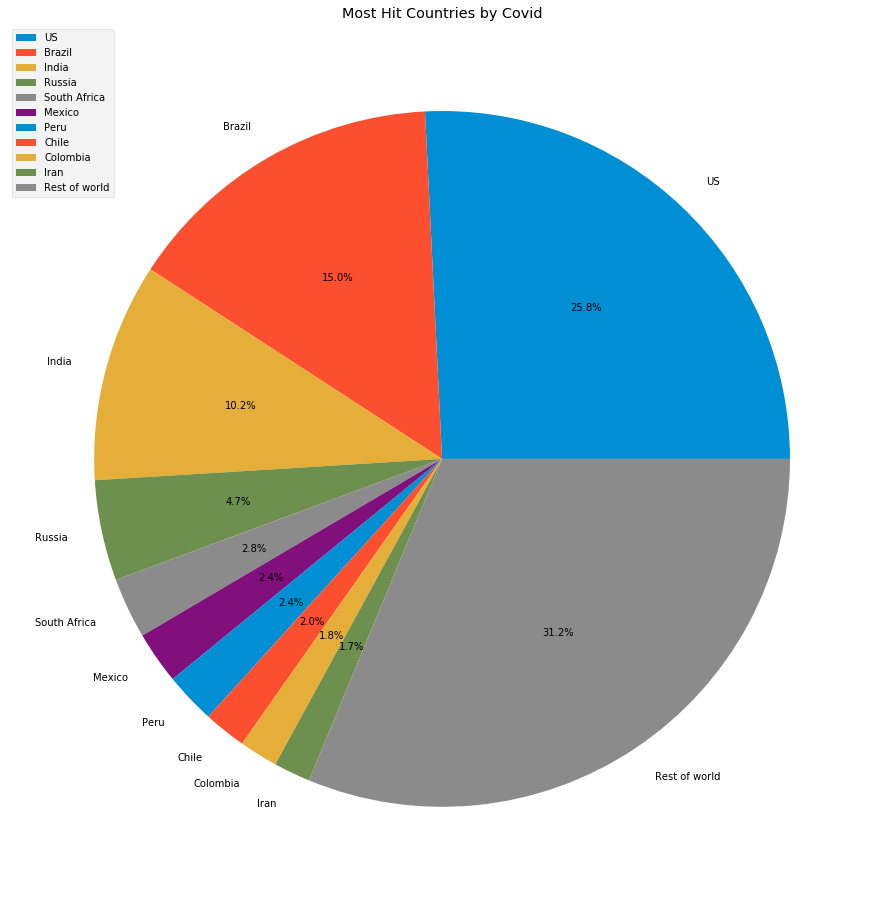

In [99]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=2)
yesterday.strftime('%Y-%m-%d')

today_df= df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending= False)[:10]
top_10.loc['Rest of world'] = today_df.sort_values(['Confirmed'], ascending= False)[10:].sum()
top_10.loc['Rest of world','Country'] ='Rest of world'


fig = plt.figure(figsize=(30,16))
ax = fig.add_subplot(111)



ax.pie(top_10['Confirmed'],labels=top_10['Country'], autopct='%1.1f%%')

ax.title.set_text('Most Hit Countries by Covid')

plt.legend(loc='best')


plt.show()